In [1]:
import sys
sys.path.append("..")

from pyeconomics.api import fred_client
from pyeconomics.taylor_rule import taylor_rule, historical_taylor_rule

In [2]:
# Calculate the current Taylor Rule
result = taylor_rule(
    inflation_target=2.0,
    alpha=0.5,
    beta=0.5,
    okun_factor=2.0,
    rho=0.70,
    verbose=True
)


==== Economic Indicators ======================================
Current Inflation:                          3.04%
Current Unemployment Rate:                  3.90%
Natural Unemployment Rate:                  4.41%
Long-Term Real Interest Rate:               2.21%
Current Fed Rate:                           5.50%

==== Gaps =====================================================
Inflation Gap:                              1.04%
Unemployment Gap:                           0.51%

==== Taylor Rule ==============================================
  Long-Term Real Interest Rate:             2.21%
  Current Inflation:                      + 3.04%
  Alpha * Inflation Gap:                  + 0.50 * 1.04%
  Beta * Okun Factor * Unemployment Gap:  + 0.50 * 2.00 * 0.51%
---------------------------------------------------------------
  Taylor Rule:                              6.28%

==== Adjusted Taylor Rule =====================================
  Adjustment Computation:
  Policy Inertia Coefficient 

In [3]:
# Calculate the historical Taylor Rule
historical_data = historical_taylor_rule(rho=0.70, apply_elb=True)
historical_data

,Inflation,UnemploymentRate,NaturalUnemploymentRate,RealInterestRate,FedRate,InflationGap,UnemploymentGap,TaylorEst,AdjustedTaylorRule
2003-01-02,2.08,5.8,5.10,2.43,1.25,0.08,-0.70,3.85,2.03
2003-01-03,2.08,5.8,5.10,2.43,1.25,0.08,-0.70,3.85,2.03
2003-01-04,2.08,5.8,5.10,2.43,1.25,0.08,-0.70,3.85,2.03
2003-01-05,2.08,5.8,5.10,2.43,1.25,0.08,-0.70,3.85,2.03
2003-01-06,2.08,5.8,5.10,2.46,1.25,0.08,-0.70,3.88,2.04
...,...,...,...,...,...,...,...,...,...
2024-04-28,3.04,3.9,4.41,2.24,5.50,1.04,0.51,6.31,5.74
2024-04-29,3.04,3.9,4.41,2.22,5.50,1.04,0.51,6.29,5.74
2024-04-30,3.04,3.9,4.41,2.28,5.50,1.04,0.51,6.35,5.76
2024-05-01,3.04,3.9,4.41,2.25,5.50,1.04,0.51,6.32,5.75


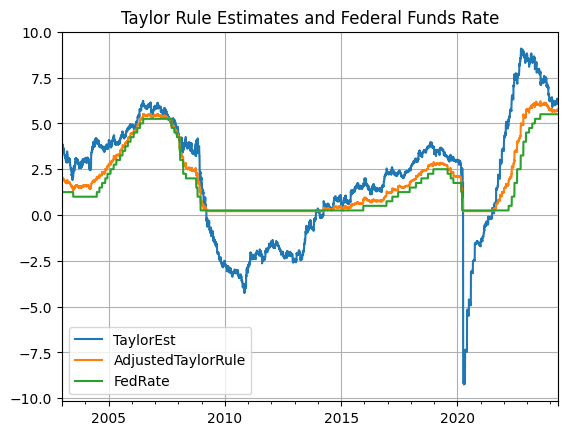

In [4]:
historical_data[['TaylorEst', 'AdjustedTaylorRule', 'FedRate']].plot(
    title='Taylor Rule Estimates and Federal Funds Rate',
    grid=True
);

In [5]:
historical_data.loc['2020-04-01']

Inflation                   1.74
UnemploymentRate           14.80
NaturalUnemploymentRate     4.50
RealInterestRate           -0.29
FedRate                     0.25
InflationGap               -0.26
UnemploymentGap           -10.30
TaylorEst                  -8.98
AdjustedTaylorRule          0.21
Name: 2020-04-01 00:00:00, dtype: float64